# Bifurcaciones con el parámetro $k_2$

In [1]:
from model import *
from scipy.signal import find_peaks

In [2]:
m = {'1': 0.125, '2': 0.025, '3': 0.005} # g
d = {'1': 0.25, '2': 0.05, '3': 0.01} # cm
r = {'1': 0.02, '2': 0.005, '3': 0.005} # g/ms
k = {'1': 0.08, '3': 0.01, '1,2': 0.025, '2,3': 0.01} # g/ms^2
c = {'1': 3 * k['1'], '3': 3 * k['3']} # g/ms^2
a0 = {'1': 0.05, '2': 0.05, '3': 0.05} # cm^2
l = 1.4 # cm
rho = 0.00113 # g/cm^3
Ps = 0.008 # g/cm ms^2

In [3]:
y0 = [0.1, 0.1, 0.1, 0, 0, 0]
t = np.linspace(0, 1000, 20001)

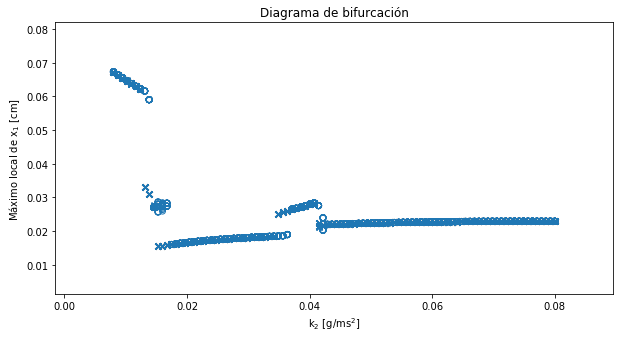

In [4]:
k2_values = np.linspace(0.008, 0.08, 100)
k2 = []
local_max = []
k2_rev = []
local_max_rev = []

def get_local_max(values, k2, local_max):
    init = y0
    for val in values:
        k['2'] = val
        c['2'] = 3 * k['2']

        sol = odeint(model, init, t, args=(m, d, r, k, c, a0, l, Ps))
        x1 = sol[:,0]
    #     x1, x2, x3 = sol[:, 0], sol[:, 1], sol[:, 2]

    #     a1 = a0['1'] + 2 * l * x1
    #     a2 = a0['2'] + 2 * l * x2
    #     a3 = a0['3'] + 2 * l * x3

    #     a_min = np.asarray([a1, a2, a3]).min(0)
    #     U = np.sqrt((2 * Ps) / rho) * a_min * np.vectorize(theta)(a_min)

        peaks, _ = find_peaks(x1)
        lm = x1[peaks][-20:]
        k2 += [val] * len(lm)
        local_max += list(lm)
        init = sol[-1,:]
        
get_local_max(k2_values, k2, local_max)
get_local_max(k2_values[::-1], k2_rev, local_max_rev)
plt.figure(figsize=(10,5))
plt.title('Diagrama de bifurcación')
plt.xlabel('k$_2$ [g/ms$^2$]')
plt.ylabel('Máximo local de x$_1$ [cm]')
plt.scatter(k2, local_max, facecolors='none', edgecolors='C0')
plt.scatter(k2_rev, local_max_rev, marker='x')
plt.show()